<ul>
<li>Erosion</li>
<li>Dilation</li>
<li>Opening</li>
<li>Closing</li>
<li>Morphological Gradient</li>
<li>Top hat</li>
<li>Black hat</li>
</ul>

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
IMG_PATH_3 = './photo-1608675873996-4d5f38b7712e.jpeg'

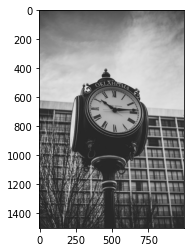

In [34]:
im = cv2.imread(IMG_PATH_3)
plt.imshow(im)

Erosion
<br>
Erosion primarily involves eroding the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves eroding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel. We can make use of NumPy’s ones() function to define a kernel. There are a lot of other functions like NumPy zeros, customized kernels, and others that can be used to define kernels based on the problem in hand.

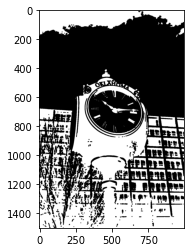

In [35]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((5, 5), np.uint8)
  
# invert the image
invert = cv2.bitwise_not(binr)
  
# erode the image
erosion = cv2.erode(invert, kernel,
                    iterations=1)
  
# print the output
plt.imshow(erosion, cmap='gray')

Dilation
<br>
Dilation involves dilating the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves expanding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel. We can make use of NumPy’s ones() function to define a kernel. There are a lot of other functions like NumPy zeros, customized kernels, and others that can be used to define kernels based on the problem at hand. It is exactly opposite to the erosion operation

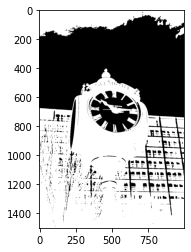

In [36]:
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
# print(kernel)
# invert the image
invert = cv2.bitwise_not(binr)
  
# dilate the image
dilation = cv2.dilate(invert, kernel, iterations=1)
  
# print the output
plt.imshow(dilation, cmap='gray')

Opening
<br>
Opening involves erosion followed by dilation in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

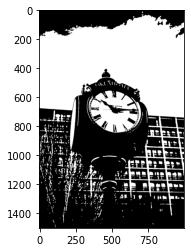

In [37]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255,
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,
                           kernel, iterations=1)
# print the output
plt.imshow(opening, cmap='gray')

Opening Image
<br>
Closing
Closing involves dilation followed by erosion in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

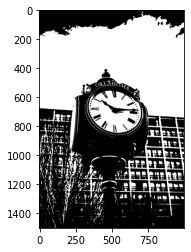

In [38]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
  
# print the output
plt.imshow(closing, cmap='gray')

Morphological Gradient
<br>
Morphological gradient is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image. The output will be an outline of the given image.

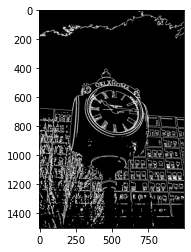

In [39]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# invert the image
invert = cv2.bitwise_not(binr)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_GRADIENT, 
                                  kernel)
  
# print the output
plt.imshow(morph_gradient, cmap='gray')

Top Hat
<br>
Top Hat is yet another morphological operation where Opening is performed on the binary image and the output of this operation is a difference between the input image and the opened image. 

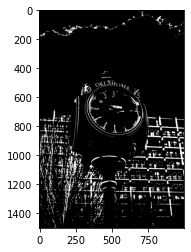

In [40]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((13, 13), np.uint8)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(binr,
                                  cv2.MORPH_TOPHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')

Black Hat
<br>
The black-hat operation is used to do the opposite, enhancing dark objects of interest on a bright background. The output of this operation is the difference between the closing of the input image and the input image. 

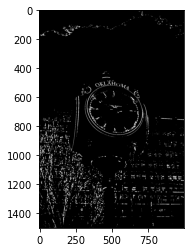

In [41]:
img = cv2.imread(IMG_PATH_3, 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((5, 5), np.uint8)
  
# invert the image
invert = cv2.bitwise_not(binr)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_BLACKHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')